<a href="https://colab.research.google.com/github/muhammadazad-IT23/Assignment-code-optimazatition/blob/main/ML_Omer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#Load the dataset using a data analysis library such as pandas.

# Load the dataset
data = pd.read_csv('/content/sample_data/clothes_price_prediction_data.csv')

# Display the first few rows of the dataset to inspect it
print(data.head())


          Brand Category  Color Size Material  Price
0   New Balance    Dress  White   XS    Nylon    182
1   New Balance    Jeans  Black   XS     Silk     57
2  Under Armour    Dress    Red    M     Wool    127
3          Nike    Shoes  Green    M   Cotton     77
4        Adidas  Sweater  White    M    Nylon    113


In [7]:
#Understand the structure and characteristics of the data and summarize the dataset’s main characteristics.

# Display the shape of the dataset (number of rows and columns)
print("Dataset shape:", data.shape)

# Display data types of each column
print("\nData Types:\n", data.dtypes)

# Check for missing values in each column
print("\nMissing values:\n", data.isnull().sum())

# Get a statistical summary of the numerical features
print("\nStatistical Summary:\n", data.describe())

# Optional: Display a sample of rows to understand what the data looks like
print("\nData Sample:\n", data.head())

Dataset shape: (1000, 6)

Data Types:
 Brand       object
Category    object
Color       object
Size        object
Material    object
Price        int64
dtype: object

Missing values:
 Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

Statistical Summary:
              Price
count  1000.000000
mean    106.289000
std      53.695444
min      10.000000
25%      59.750000
50%     108.000000
75%     150.000000
max     199.000000

Data Sample:
           Brand Category  Color Size Material  Price
0   New Balance    Dress  White   XS    Nylon    182
1   New Balance    Jeans  Black   XS     Silk     57
2  Under Armour    Dress    Red    M     Wool    127
3          Nike    Shoes  Green    M   Cotton     77
4        Adidas  Sweater  White    M    Nylon    113


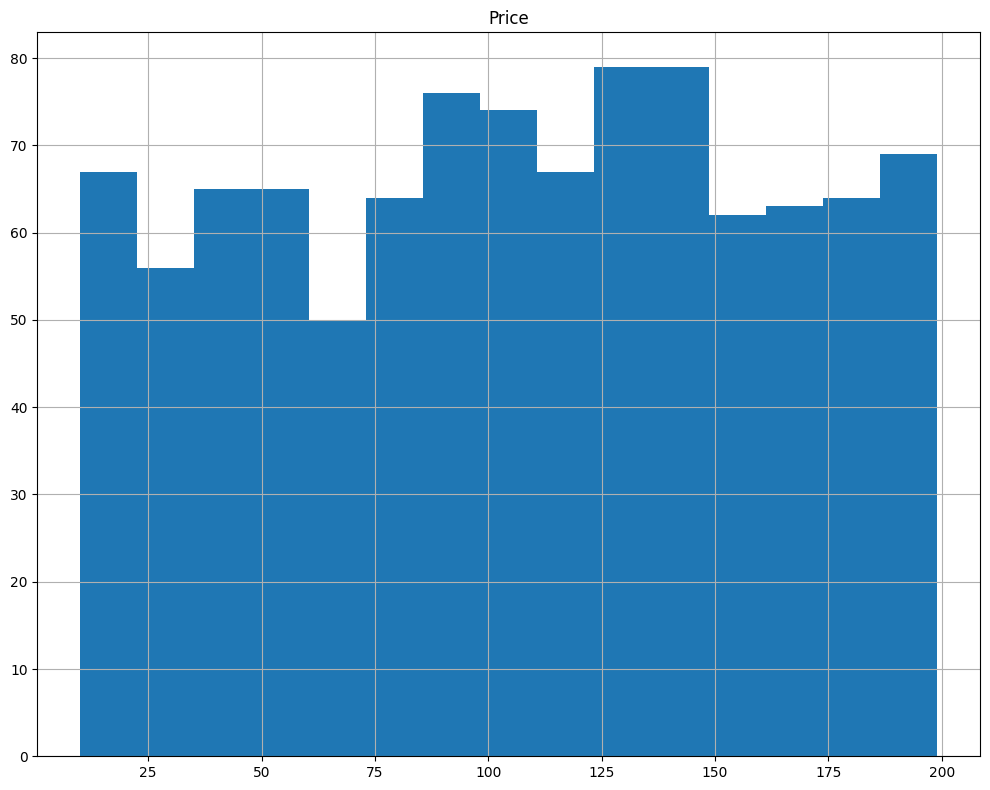

In [11]:
#Visualize the data distribution and relationships between features.

data.hist(figsize=(10, 8), bins=15)
plt.tight_layout()  # Adjusts plot parameters to give a tight layout.
plt.show()


In [17]:
#Handle missing values appropriately.

print(data.isnull().sum())


Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64


In [22]:
#Encode categorical variables if needed (e.g., using one-hot encoding).

print(data.dtypes)
data = pd.get_dummies(data)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

print(data.head())

Price                 int64
Brand_Adidas           bool
Brand_New Balance      bool
Brand_Nike             bool
Brand_Puma             bool
Brand_Reebok           bool
Brand_Under Armour     bool
Category_Dress         bool
Category_Jacket        bool
Category_Jeans         bool
Category_Shoes         bool
Category_Sweater       bool
Category_T-shirt       bool
Color_Black            bool
Color_Blue             bool
Color_Green            bool
Color_Red              bool
Color_White            bool
Color_Yellow           bool
Size_L                 bool
Size_M                 bool
Size_S                 bool
Size_XL                bool
Size_XS                bool
Size_XXL               bool
Material_Cotton        bool
Material_Denim         bool
Material_Nylon         bool
Material_Polyester     bool
Material_Silk          bool
Material_Wool          bool
dtype: object
   Price  Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  \
0    182         False               True       F

In [31]:
# Normalize or scale the features to improve model performance.

scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())

          Brand Category  Color Size Material     Price
0   New Balance    Dress  White   XS    Nylon  1.410713
1   New Balance    Jeans  Black   XS     Silk -0.918396
2  Under Armour    Dress    Red    M     Wool  0.385905
3          Nike    Shoes  Green    M   Cotton -0.545738
4        Adidas  Sweater  White    M    Nylon  0.125045


In [40]:
#Split the dataset into training and testing sets (e.g., 70% training, 30% testing).

# Assuming 'Category' is your features and 'Material' is your target column
X = data.drop('Category', axis=1)  # This removes the 'Category' column from the input features
y = data['Material']  # This sets 'y' to be the 'Material' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Print the sizes of the datasets to verify
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 700 samples
Testing set size: 300 samples
